# MNIST dataset downloaded from Kaggle : 
>### Data Set Available at : https://www.kaggle.com/c/digit-recognizer/data
> Will be using Train set For visalization

> Great Source to check further : http://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Loading Data
df = pd.read_csv('data/mnist_train.csv')
df.shape

(42000, 785)

In [2]:
df.head()
# 'label' : [0 to 9 labels]
# '28 X 28 image data set = 784'

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
img = df.iloc[:,1:].copy()
l = df['label']

img.shape, l.shape

((42000, 784), (42000,))

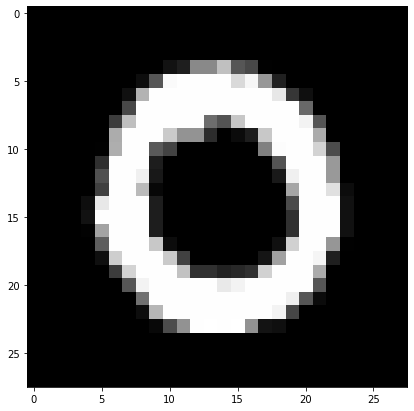

0


In [4]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1

grid_data = img.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

# 2D Visualization using PCA

> ## Manual
> - Pick 15k points for visualization
> - Perform Standardization on All columns (Mean 0 & Unit variance)
> - Compute Covariance Matrix
> - Finding the top two eigen-values and corresponding eigen-vectors for Visualization of Data

> ## Scikit Learn

In [5]:
# Picking top 15k data points
labels = l.head(15000)
data = img.head(15000)

print("the shape of sample data = ", data.shape)


# Standardization
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print ( "The shape of covariance matrix = ", covar_matrix.shape)

the shape of sample data =  (15000, 784)
(15000, 784)
The shape of covariance matrix =  (784, 784)


## from scipy.linalg import eigh 
> - ### eigh(covar_matrix, eigvals=(782,783)

> Will compute the eigen values and eign vectors in ascending order for entire covariance matrix. As we are looking to vsualizae the top two only
We have covar matrix of 784 x 784 so the values of our interest will be 783 & 782 (Python index start from 0)

In [6]:
from scipy.linalg import eigh 

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)

# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [7]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [8]:
# appending label to the 2D projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
new_data = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(new_data.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\parve\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


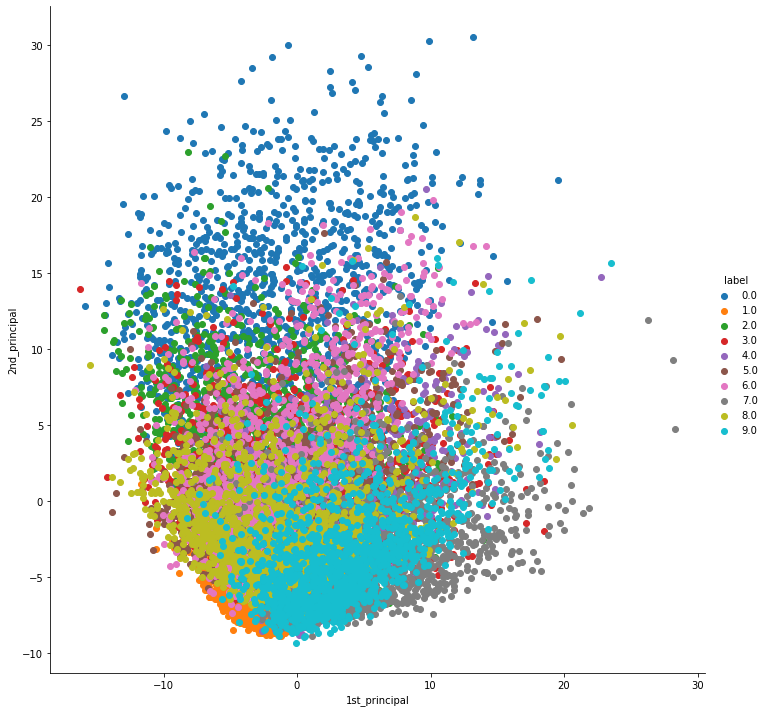

In [9]:
# ploting the 2d data points with seaborn
import seaborn as sn
# fig, ax = plt.subplots(figsize=(20,12))
sn.FacetGrid(new_data, hue="label", size=10).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA Usig Scikit - Learn

shape of pca_reduced.shape =  (15000, 2)
(15000, 3)


C:\Users\parve\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


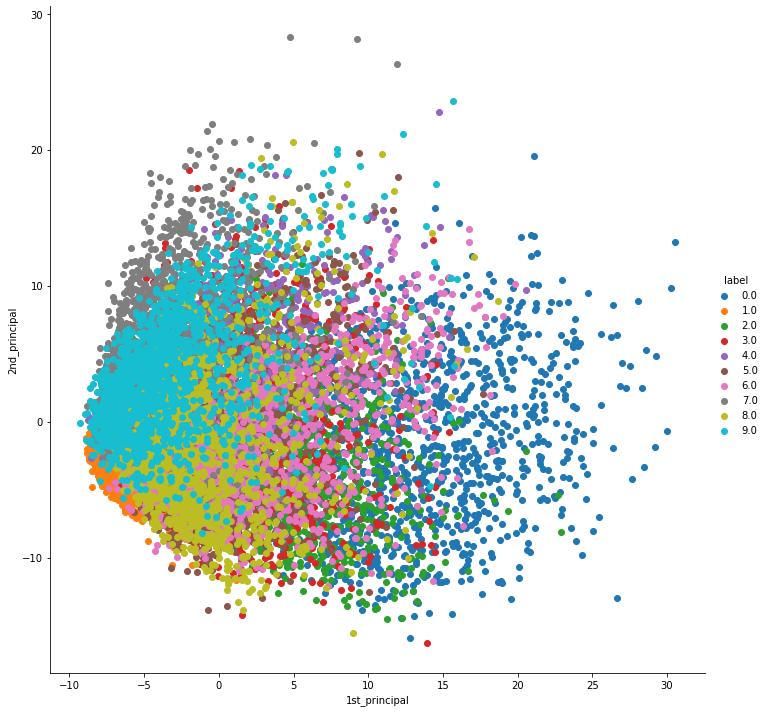

In [10]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T
print(pca_data.shape)

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

sn.FacetGrid(pca_df, hue="label", size=10).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for Dimensionality Reduction
> In general for visualization we go for 2 or 3  dimension as we can iage such dimensions.
> In case of Training a model we muct get the features which are contributing high variance so there we may need higher number of Dimension.
> #### how many Dimension do i need for training of my model (eg : 90% atleast) ?
>> As for reducing the dimension in case of visualization we have used the Eigen Vectors 
>> # Eigen Vectors : The Vector which are not chainging their span during transformation
>> # Eigen Value : The stretch or squishes of the desired eigen vector (Scalar Value).

>> We will use Eigen Value here as that tells the variance explained by the desired feature.
>> λ1, λ2, λ3 ----- λn
>> Suppose we have to select the features till atleast 90% (let say d is 20)
>> (λ1+λ2+λ3+....λd)/(sum of all λ) = 0.90

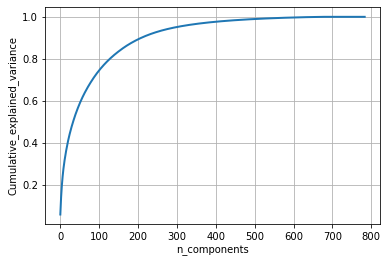

In [11]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_) # Calculating the variance

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.